# Unsupervised Capstone Project
# Goal: Build an unsupervised model that will classify authors based on the style of writing using natural language processing.
 

In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 100)

# Define functions to clean, lemmatize and process the text file as a string.

In [144]:
#This function expects a raw string. The purpose of this function is to take the string
#text and remove double dashes, punctuactions and special characters.
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    #text = re.sub(r'[\r|\n|\r\n]+', "", text)
    text = re.sub('[^a-zA-z0-9\s]', "", text)
    text = ' '.join(text.split())
    return text

In [145]:
#define a function to lemmatize the list
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
#nlp = spacy.load('en', parse = False, tag=False, entity=False)


#create a function to lemmatize the text in the combine list
def lemmatizestring(text):

    lmtzr = WordNetLemmatizer()

    return(" ".join([lmtzr.lemmatize(word) for word in word_tokenize(text)]))
    
    #using the following line of code creates a [E088] Text of length 1166183 exceeds maximum of 1000000.
    #text = nlp(text)
    #text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    #return text

In [146]:
#The function will take a raw text string and tokenize the words for given number. 
#For example, if the function is given a raw text string and the 100 as input parameters
#it will create 100 tokenized words store it in a list and repeat the process. The result 
#will be multiple lists equal to the num_of_words parametar.
#The purpose of this function is create a list of words that can be passed as input parameters 
#to our tfidf function that is used to create featurs.

def chunck_words(text,num_of_words):

    text = text.split(' ') #split on whitespace creates a token
    results = []
    res = []
    for word in text:
        res.append(word)
        if len(res)==num_of_words:
            results.append(" ".join(res))
            res = []
    results.append(" ".join(res))
    return(results)

# Import text files in string format from ten different authors/sources. Execute functions to clean, lemmatize and process the files. 

In [147]:
#load in the documents from nltk in a raw string 
#gutenberg.raw
#:return: the given file(s) as a single string.
#:rtype: str
caesar_raw_string = gutenberg.raw('shakespeare-caesar.txt')
hamlet_raw_string = gutenberg.raw('shakespeare-hamlet.txt')
macbeth_raw_string = gutenberg.raw('shakespeare-macbeth.txt')
ball_raw_string = gutenberg.raw('chesterton-ball.txt')
brown_raw_string = gutenberg.raw('chesterton-brown.txt')
thursday_raw_string = gutenberg.raw('chesterton-thursday.txt')
moby_dick_raw_string = gutenberg.raw('melville-moby_dick.txt')
bryant_raw_string = gutenberg.raw('bryant-stories.txt')
leaves_raw_string = gutenberg.raw('whitman-leaves.txt')
busterbrown_raw_string = gutenberg.raw('burgess-busterbrown.txt')

In [148]:
#macbeth_raw_string

In [149]:
#Clean the raw file loaded as a string and print the output
caesar_cleaned_text = text_cleaner(caesar_raw_string)
hamlet_cleaned_text = text_cleaner(hamlet_raw_string)
macbeth_cleaned_text = text_cleaner(macbeth_raw_string)
ball_cleaned_text = text_cleaner(ball_raw_string)
brown_cleaned_text = text_cleaner(brown_raw_string)
thursday_cleaned_text = text_cleaner(thursday_raw_string)
moby_dick_cleaned_text = text_cleaner(moby_dick_raw_string)
bryant_cleaned_text = text_cleaner(bryant_raw_string)
leaves_cleaned_text = text_cleaner(leaves_raw_string)
busterbrown_cleaned_text = text_cleaner(busterbrown_raw_string)

In [150]:
#Lemmatize the file to show the root words
caesar_lemmatize_text = lemmatizestring(caesar_cleaned_text)
hamlet_lemmatize_text = lemmatizestring(hamlet_cleaned_text)
macbeth_lemmatize_text = lemmatizestring(macbeth_cleaned_text)
ball_lemmatize_text = lemmatizestring(ball_cleaned_text)
brown_lemmatize_text = lemmatizestring(brown_cleaned_text)
thursday_lemmatize_text = lemmatizestring(thursday_cleaned_text)
moby_dick_lemmatize_text = lemmatizestring(moby_dick_cleaned_text)
bryant_lemmatize_text = lemmatizestring(bryant_cleaned_text)
leaves_lemmatize_text = lemmatizestring(leaves_cleaned_text)
busterbrown_lemmatize_text = lemmatizestring(busterbrown_cleaned_text)

In [151]:
#verify output of one file
#moby_dick_lemmatize_text

In [152]:
#take the raw string and tokenize it for 1000 words.
num_of_words = 1000
new_tokenized_list_caesar=chunck_words(caesar_lemmatize_text,num_of_words)
new_tokenized_list_hamlet=chunck_words(hamlet_lemmatize_text,num_of_words)
new_tokenized_list_macbeth=chunck_words(macbeth_lemmatize_text,num_of_words)
new_tokenized_list_ball=chunck_words(ball_lemmatize_text,num_of_words)
new_tokenized_list_brown=chunck_words(brown_lemmatize_text,num_of_words)
new_tokenized_list_thursday=chunck_words(thursday_lemmatize_text,num_of_words)
new_tokenized_list_moby_dick=chunck_words(moby_dick_lemmatize_text,num_of_words)
new_tokenized_list_bryant=chunck_words(bryant_lemmatize_text,num_of_words)
new_tokenized_list_leaves=chunck_words(leaves_lemmatize_text,num_of_words)
new_tokenized_list_busterbrown=chunck_words(busterbrown_lemmatize_text,num_of_words)


In [153]:
#verify output of one file
#new_tokenized_list_macbeth

# After all files have been imported, cleaned and process then identify the lenght of each file and combine them into one file. Create a y vector that contains the aurthor/source name of each file. 

In [154]:
#Print the lengths of the tokenized list, as this will help us later on verify if we 
#have the correct number of rows when we combine the files.
print('lenght of caesar: ',len(new_tokenized_list_caesar))
print('lenght of hamlet: ',len(new_tokenized_list_hamlet))
print('lenght of macbeth: ',len(new_tokenized_list_macbeth))
print('lenght of ball: ',len(new_tokenized_list_ball))
print('lenght of brown: ',len(new_tokenized_list_brown))
print('lenght of thursday: ',len(new_tokenized_list_thursday))
print('lenght of moby dick: ',len(new_tokenized_list_moby_dick))
print('lenght of bryant: ',len(new_tokenized_list_bryant))
print('lenght of leaves: ',len(new_tokenized_list_leaves))
print('lenght of busterbrown: ',len(new_tokenized_list_busterbrown))
print('total lenght is',len(new_tokenized_list_caesar)+
     len(new_tokenized_list_hamlet)+ len(new_tokenized_list_macbeth)
     +len(new_tokenized_list_ball)+len(new_tokenized_list_brown)+
     len(new_tokenized_list_thursday)+len(new_tokenized_list_moby_dick)+
     len(new_tokenized_list_bryant)+len(new_tokenized_list_leaves)+
     len(new_tokenized_list_busterbrown))

lenght of caesar:  21
lenght of hamlet:  30
lenght of macbeth:  18
lenght of ball:  82
lenght of brown:  72
lenght of thursday:  59
lenght of moby dick:  214
lenght of bryant:  47
lenght of leaves:  123
lenght of busterbrown:  16
total lenght is 682


In [155]:
#Combine the tokenized list and create the Y vector by adding the source name of the
#file
combine_tokenized_liststring = new_tokenized_list_caesar
print('combine tokenized length:',len(combine_tokenized_liststring))
y=['caesar'] * len(new_tokenized_list_caesar)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_hamlet)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['hamlet'] * len(new_tokenized_list_hamlet)
print('length of y is:',len(y))


combine_tokenized_liststring.extend(new_tokenized_list_macbeth)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['macbeth'] * len(new_tokenized_list_macbeth)
print('length of y is:',len(y))


combine_tokenized_liststring.extend(new_tokenized_list_ball)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['ball'] * len(new_tokenized_list_ball)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_brown)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['brown'] * len(new_tokenized_list_brown)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_thursday)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['thursday'] * len(new_tokenized_list_thursday)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_moby_dick)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['moby_dick'] * len(new_tokenized_list_moby_dick)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_bryant)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['bryant'] * len(new_tokenized_list_bryant)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_leaves)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['leaves'] * len(new_tokenized_list_leaves)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_busterbrown)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['busterbrown'] * len(new_tokenized_list_busterbrown)
print('length of y is:',len(y))

combine tokenized length: 21
length of y is: 21
combine tokenized length: 51
length of y is: 51
combine tokenized length: 69
length of y is: 69
combine tokenized length: 151
length of y is: 151
combine tokenized length: 223
length of y is: 223
combine tokenized length: 282
length of y is: 282
combine tokenized length: 496
length of y is: 496
combine tokenized length: 543
length of y is: 543
combine tokenized length: 666
length of y is: 666
combine tokenized length: 682
length of y is: 682


In [156]:
#y[151]

In [157]:
#combine_tokenized_liststring[151]

In [158]:
np.unique(y)

array(['ball', 'brown', 'bryant', 'busterbrown', 'caesar', 'hamlet',
       'leaves', 'macbeth', 'moby_dick', 'thursday'], dtype='<U11')

In [159]:
#test = y[151]+ ' ' + combine_tokenized_liststring[151]
#test

# Generate Features

In [160]:
# load nltk's English stopwords as variable called 'stopwords' we will use this as a parameter
# in the CountVectorizer and TFIDF function
stopwords = nltk.corpus.stopwords.words('english')

In [161]:
#Use tfitd to create our features
#tf-idf gives is how important a word is to a document
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=3, # only use words that appear at least twice
                             stop_words=stopwords, 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
tfidf=vectorizer.fit_transform(combine_tokenized_liststring)
terms = vectorizer.get_feature_names()
X_tfidf = pd.DataFrame(data=tfidf.toarray(),
             columns=terms)
X_tfidf.head()

#define the test/train split set.
from sklearn.model_selection import train_test_split

Y = y
X = X_tfidf
#X = combine_tokenized_liststring

#Let's train with 75% of our data and reserve 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [162]:
X_tfidf.head()

,10,11,12,13,14,15,16,17,18,1839,19,20,21,30,40,45,50,90,_had_,_he_,_page,_so_,_the,_was_,_you_,aback,abandon,abandoned,abandonment,abased,abated,abhorred,abide,ability,ablaze,able,abnormal,aboard,abominable,abomination,aboriginal,aborigine,aboue,abound,abounding,abraham,abreast,abroad,abrupt,abruptly,...,yankees,yard,yardarm,yarn,yawn,yawned,yawning,ye,yea,year,yeare,yearning,years,yee,yeeld,yell,yelled,yelling,yellow,yes,yesterday,yeve,yield,yielded,yielding,yoake,yojo,yoke,yoked,yon,yond,yonder,yong,york,yosemite,youd,youl,youll,young,younger,youngest,youngster,youre,youth,youthful,youve,zealand,zodiac,zone,zoological
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.029528,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019743,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.046900,0.0,0.0,0.0,0.0,0.000000,0.035411,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.040202,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.031975,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.093085,0.0,0.0,0.0,0.0,0.0,0.017522,0.000000,0.0,0.0,0.0,0.0,0.046542,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.016927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
X_tfidf.shape

(682, 12088)

In [ ]:
#The next four cells is my attempt to use Singular Value Decomposition (SVD) function from sklearn rather than PCA
#to see if there was another way to display the source,clusters and top terms. It is just an attempt and not used 
#by any codes used in the clusters or models. 

#Only the TFIDF is used for the prediction of clusters and models

In [136]:
#Applying the vectorizer
lsa_tfidf=vectorizer.fit_transform(combine_tokenized_liststring)
#print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(lsa_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
#n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
#tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train_tfidf[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence:   (0, 3937)	0.04392147331703703
  (0, 8191)	0.03292373324254041
  (0, 123)	0.02625844033111456
  (0, 7725)	0.04392147331703703
  (0, 6742)	0.03877634024366426
  (0, 11621)	0.03140357340448733
  (0, 5622)	0.04256812629614662
  (0, 9980)	0.03742299322277385
  (0, 6864)	0.05895451731772525
  (0, 7049)	0.03326904471134498
  (0, 7376)	0.045577836205289886
  (0, 1661)	0.026682719118820045
  (0, 1456)	0.04256812629614662
  (0, 1742)	0.03806886631591318
  (0, 4212)	0.039558416387003366
  (0, 5928)	0.034837562101336074
  (0, 871)	0.04256812629614662
  (0, 1022)	0.04256812629614662
  (0, 4535)	0.04256812629614662
  (0, 4586)	0.03292373324254041
  (0, 1594)	0.02372168386258115
  (0, 5378)	0.03227786014940108
  (0, 11932)	0.022065320974328295
  (0, 1570)	0.02625844033111456
  (0, 4488)	0.029692429027963308
  :	:
  (0, 11863)	0.045577836205289886
  (0, 11546)	0.08186701062684343
  (0, 5957)	0.018242346397097896
  (0, 4888)	0.018625546729275768
  (0, 11976)	0.02598848847374271
  (

In [140]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=tfidf_bypara)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])



Percent variance captured by all components: 52.215404121952346
Component 0:
{'palate': 0.06418345132128829, 'junction': 0.06418345132128829, 'overcome': 0.06418345132128829, 'sidefins': 0.06185093412302282, 'bullock': 0.06418345132128829, 'porthole': 0.06185093412302282, 'freighted': 0.05693799112284991, 'footpath': 0.059945128804734175, 'budge': 0.059945128804734175, 'faithfully': 0.05360919761610926, 'sluggish': 0.05693799112284991, 'unattended': 0.06418345132128829, 'excepting': 0.05693799112284991, 'yoked': 0.06185093412302282, 'canal': 0.051862983023653234, 'dimly': 0.05360919761610926, 'enormousness': 0.06418345132128829, 'preceding': 0.05460547392458444, 'saddest': 0.06185093412302282, 'casualty': 0.059945128804734175, 'unwonted': 0.06185093412302282, 'dick': 0.04065072179521987, 'moby': 0.04065072179521987, 'practicable': 0.06185093412302282, 'designated': 0.06185093412302282, 'laborer': 0.051862983023653234, 'securing': 0.05693799112284991, 'daggoo': 0.04636373741767088, 'peq

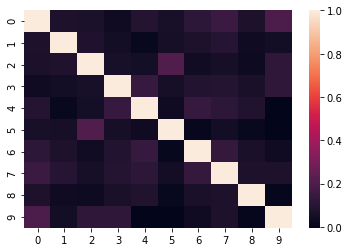

Key:
0 {'impartiality': 0.05948229161252008, 'corroborate': 0.05948229161252008, 'understands': 0.05948229161252008, 'encloses': 0.05732062119246233, 'centrifugal': 0.05732062119246233, 'centripetal': 0.05948229161252008, 'balk': 0.05276752997975832, 'amplitude': 0.05276752997975832, 'offset': 0.05948229161252008, 'realization': 0.05732062119246233, 'forever': 0.03693713023190821, 'teacher': 0.04806424423432204, 'inanimate': 0.05732062119246233, 'undertake': 0.05948229161252008, 'anticipated': 0.05948229161252008, 'untold': 0.10325304819925299, 'faithfully': 0.049682556174054954, 'presentation': 0.05732062119246233, 'sixtyfive': 0.11464124238492467, 'undeniable': 0.05555440785607328, 'invite': 0.05555440785607328, 'audible': 0.05948229161252008, 'giver': 0.05555440785607328, 'dividing': 0.049682556174054954, 'behavior': 0.05732062119246233, 'faithful': 0.04212488459054975, 'architect': 0.10325304819925299, 'vacuum': 0.054061095757866315, 'fluid': 0.04296779454129319, 'twentyfour': 0.05

In [141]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=tfidf_bypara).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

In [ ]:
#Singular Value Decomposition (SVD) above is NOT used in the remaining cells for clustering or model prediction##


# Generate clusters for K-means,MeanShift,SpectralClustering and AffinityPropagation

Top terms per cluster:
Cluster 0:
king
david
fir
jackal
came
brahmin
alligator
tree
saw
robert


Cluster 1:
boat
ship
whale
sea
captain
though
ahab
pequod
stubb
crew


Cluster 2:
turnbull
macian
evan
quite
wall
sword
god
mean
garden
really


Cluster 3:
haue
ham
lord
enter
thou
caesar
macb
king
brutus
bru


Cluster 4:
ahab
ye
whale
captain
queequeg
starbuck
thou
stubb
ship
aye


Cluster 5:
syme
gregory
professor
bull
sunday
marquis
dr
secretary
anarchist
colonel


Cluster 6:
brown
buster
father
flambeau
joe
priest
bear
looked
think
browns


Cluster 7:
whale
sperm
boat
ship
sea
leviathan
though
stubb
oil
water


Cluster 8:
love
soul
thee
shall
song
land
earth
thy
city
woman


Cluster 9:
landlord
bed
harpooneer
queequeg
mouse
room
tomahawk
think
sleep
street


Prediction


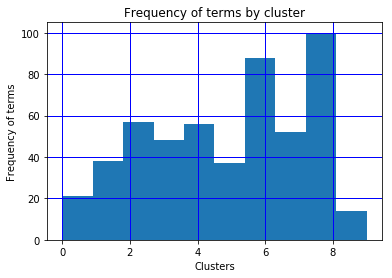

In [164]:
#I was trying to see if I could print the K-means clusters, top terms by author source. However, I have only been 
#successfully at printing the Clusters and top terms 

from sklearn.cluster import KMeans
n_clusters = 10
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(X_train)
pred = model.predict(X_train) 

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind])
    #for ind, y_train in zip(order_centroids[i, :10], resultSet):
        #print('Terms: %s    Authours: %d' % (terms[ind], resultSet))
    #print

    print("\n")
print("Prediction")


#print(pd.crosstab(y_train, pred, margins=True, margins_name="Total"))


plt.hist(model.labels_, bins=n_clusters)
plt.xlabel('Clusters')
plt.grid(color='b', linestyle='-', linewidth=1)
plt.ylabel('Frequency of terms')
plt.title('Frequency of terms by cluster')
plt.show()


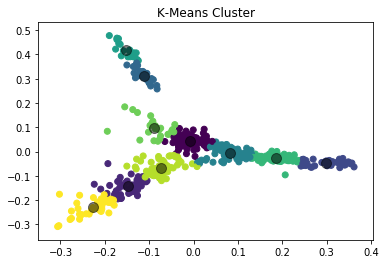

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,


In [165]:
#Running k-means cluster using with PCA
from sklearn.cluster import KMeans


# Normalize the data.
X_norm = normalize(X_train)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
km = KMeans(n_clusters=10,n_init = 5, n_jobs = -1).fit(X_pca)
y_pred = km.fit_predict(X_pca)
#y_pred = KMeans(n_clusters=10,n_init = 5, n_jobs = -1).fit_predict(X_train)
labels = km.labels_

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

centers =km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.title('K-Means Cluster')
plt.show()

#create a result table
data = [{'Cluster':'K-Means', 'Number of clusters': n_clusters, 'RI Score': '',
         'RI adjusted score': ''}]
df_results = pd.DataFrame(data)

df_results

#The model has a cluster centers attribute that returns the coordinates of each of the 
#k cluster centroids. Each token in the vectorizer we created earlier has a dimension or 
#coordinate in the centroid and represents its relative frequency within that cluster. 
#So to find the words with the highest frequency in a cluster, we have to locate the 
#indices of the highest values of the centroid, which then correspond to the indices of 
#the tokens in the vectorizer. Therefore, below are the top ten frequented words in 
#each cluster for K-Means


#common_words = y_pred.cluster_centers_.argsort()[:,-1:-11:-1]
#for num, centroid in enumerate(common_words):
#    print(str(num) + ' : ' + ', '.join(terms[word] for word in centroid))

Number of estimated clusters: 8


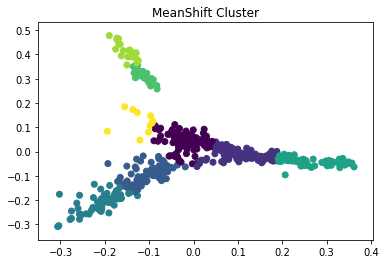

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,


In [166]:
#mean shift

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.1, n_samples=X_tfidf.shape[0])


# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_pca)
ms_pred = ms.fit_predict(X_pca)
#ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
#print ("Labels identified: {}".format(labels)) # dosn't tell me much as it is just numbers

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('MeanShift Cluster')
plt.show()

#update result table
data = [{'Cluster':'MeanShift', 'Number of clusters': n_clusters_, 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results


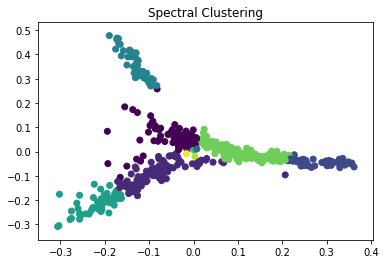

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,
0,SpectralClustering,10,,


In [167]:
#apectral clustering
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)
sc_pred = sc.fit_predict(X_pca)

#Predicted clusters.
predict=sc.fit_predict(X_pca)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

#update result table
data = [{'Cluster':'SpectralClustering', 'Number of clusters': n_clusters, 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

In [168]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_pca)
af_pred = af.fit_predict(X_pca)
#print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

#update result table
data = [{'Cluster':'AffinityPropagation', 'Number of clusters': len(cluster_centers_indices), 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

Estimated number of clusters: 14


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,
0,SpectralClustering,10,,
0,AffinityPropagation,14,,


In [169]:
#reset the index so that I can update the RI and adjusted score later.
df_results = df_results.reset_index(drop=True)
df_results

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
1,MeanShift,8,,
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


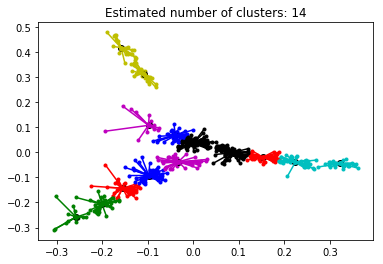

In [170]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_pca[cluster_centers_indices[k]]
    plt.plot(X_pca[class_members, 0], X_pca[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_pca[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
#plt.title('Affinity Propagation')
plt.show()

# Evaluate the accurcy for each of the clusters

In [171]:
# Note: the itertools module is tons of fun and very useful.
from sklearn.metrics import silhouette_score
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.

#y_pred = k-means

c = list(itertools.product(y, y_pred))

#print("this is the product of y and y_pred:",c[21])

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print("The RIcounts are:", RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
#RI score is the ratio of the number of pairs where the ground truth and the new solution 
#agree, over the total number of pairs.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print("The RIscore is:", RIscore)

from sklearn import metrics

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, y_pred)
print("The adjusted rand score is:",RIadjusted )
#print('Silhouette Score: {:0.7}'.format(silhouette_score(X, y_pred, metric='euclidean')))

#update the result table with the RI score and adjust score
df_results.loc[[0],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The RIscore is: 0.02147189973084803
The adjusted rand score is: 0.4363747097158875


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0214719,0.436375
1,MeanShift,8,,
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


In [172]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = mean shift
c = list(itertools.product(y, ms_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
#print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, ms_pred)
print("The adjusted rand score is:",RIadjusted)


#update the result table with the RI score and adjust score
df_results.loc[[1],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The adjusted rand score is: 0.4650320876652376


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0214719,0.436375
1,MeanShift,8,0.00883209,0.465032
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


In [173]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = spectural clustering
c = list(itertools.product(y, sc_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
#print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, sc_pred)
print("The adjusted rand score is:",RIadjusted)


#update the result table with the RI score and adjust score
df_results.loc[[2],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The adjusted rand score is: 0.4926887534218416


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0214719,0.436375
1,MeanShift,8,0.00883209,0.465032
2,SpectralClustering,10,0.0275723,0.492689
3,AffinityPropagation,14,,


In [174]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = affinity propergation
c = list(itertools.product(y_train, af_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
#print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, af_pred)
print("The adjusted rand score is:",RIadjusted)

#update the result table with the RI score and adjust score
df_results.loc[[3],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The adjusted rand score is: 0.33047629828133523


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0214719,0.436375
1,MeanShift,8,0.00883209,0.465032
2,SpectralClustering,10,0.0275723,0.492689
3,AffinityPropagation,14,0.018141,0.330476


# In summation based on my results table none of my clusters are predicting a 100% agreement between my ground truth and my solution but Spectral Clusterin is predicting the higher RI adjusted score and implies it is predicting the most accurate number of clusters. 

In [124]:
#The next two cells are my attempt to create a heatmap to indicate the clusters, top terms and source but is is 
# Not working
confusion_matrix(y_test,y_pred)

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 21,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

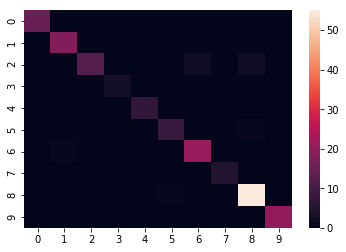

In [122]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Generate Models

In [47]:
#my data is already in a train_test split file no need to do it again.

In [96]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


from sklearn import ensemble
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=10)
train = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#print('Training set score:', knn.score(X_train, y_train))
#print('\nTest set score:', knn.score(X_test, y_test))
#print('\nTraining std score:', rfc (X_test, y_test))
#print('\nTest std score:', rfc.score(X_test, y_test))

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(knn, X_train, y_train, cv=5)
cv_results_test = cross_val_score(knn, X_test, y_test, cv=5)
print('KNN Training mean set score:', cv_results_train.mean())
print('KNN Testing mean set score:', cv_results_test.mean())

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('\n KNN Confustion Matrix \n', confusion_matrix(y_test,y_pred))  
print('\n KNN Classification Report \n', classification_report(y_test,y_pred))  
print('\n KNN accuracy score:', accuracy_score(y_test, y_pred))  

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


KNN Training mean set score: 0.9786117517268057
KNN Testing mean set score: 0.9363743799727022

 KNN Confustion Matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  1 14  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 20]]

 KNN Classification Report 
               precision    recall  f1-score   support

        ball       1.00      1.00      1.00        15
       brown       0.95      1.00      0.97        18
      bryant       1.00      0.88      0.93        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       1.00      1.00      1.00         9
      leaves       0.96      1.00      0.98        22
     macbeth       1.00      1.00      1.00         5
   moby_dick       1.00      1.

In [95]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


from sklearn import ensemble
from sklearn.model_selection import train_test_split

svc = LinearSVC()
train = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

#print('Training set score:', svc.score(X_train, y_train))
#print('\nTest set score:', svc.score(X_test, y_test))
#print('\nTraining std score:', rfc (X_test, y_test))
#print('\nTest std score:', rfc.score(X_test, y_test))



#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(svc, X_train, y_train, cv=5)
cv_results_test = cross_val_score(svc, X_test, y_test, cv=5)
print('SVC Training mean set score:', cv_results_train.mean())
#print('RFC Training set score:', cv_results_train)
print('SVC Testing mean set score:', cv_results_test.mean())
#print('RFC Testing set score:', cv_results_test)

print('\n Support vector cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Support vector classification report \n',classification_report(y_test,y_pred))  
print('\n Support vector accuracy score:',accuracy_score(y_test, y_pred))  

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


SVC Training mean set score: 0.9942846872753414
SVC Testing mean set score: 0.9827296736464819

 Support vector cufusion matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  1  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 20]]

 Support vector classification report 
               precision    recall  f1-score   support

        ball       1.00      1.00      1.00        15
       brown       1.00      1.00      1.00        18
      bryant       1.00      0.94      0.97        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       1.00      1.00      1.00         9
      leaves       1.00      1.00      1.00        22
     macbeth       1.00      1.00      1.00         5
   moby_dic

In [97]:
#Execute the RandomForestClassifier Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
train = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

#print('Training set score:', rfc.score(X_train, y_train))
#print('\nTest set score:', rfc.score(X_test, y_test))
#print('\nTraining std score:', rfc (X_test, y_test))
#print('\nTest std score:', rfc.score(X_test, y_test))



#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(rfc, X_train, y_train, cv=5)
cv_results_test = cross_val_score(rfc, X_test, y_test, cv=5)
print('RFC Training mean set score:', cv_results_train.mean())
#print('RFC Training set score:', cv_results_train)
print('RFC Testing mean set score:', cv_results_test.mean())
#print('RFC Testing set score:', cv_results_test)

print('\n Random Forest confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Random Forest classification report \n',classification_report(y_test,y_pred))  
print('Random Forest accuracy score:',accuracy_score(y_test, y_pred)) 

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RFC Training mean set score: 0.7951986611818358
RFC Testing mean set score: 0.6710493719276053

 Random Forest confusion matrix 
 [[14  0  0  0  0  0  1  0  0  0]
 [ 1 14  0  0  0  0  0  0  1  2]
 [ 1  1 11  0  0  0  1  0  2  0]
 [ 1  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  6  1  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  1  0  2  0  0  2  0  0]
 [ 0  0  0  0  0  0  1  0 55  0]
 [ 4  0  0  0  0  0  1  0  5 10]]

 Random Forest classification report 
               precision    recall  f1-score   support

        ball       0.67      0.93      0.78        15
       brown       0.88      0.78      0.82        18
      bryant       0.92      0.69      0.79        16
 busterbrown       1.00      0.33      0.50         3
      caesar       0.75      0.86      0.80         7
      hamlet       0.90      1.00      0.95         9
      leaves       0.85      1.00      0.92        22
     macbeth       1.00      0.40      0.57         5
   moby_dick

In [98]:
#Execute the LogisticRegression Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#print(X_train.shape, y_train.shape)
#print('Training set score:', lr.score(X_train, y_train))
#print('\nTest set score:', lr.score(X_test, y_test))

#compare the training and testing results using cross validation
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(lr, X_train, y_train, cv=5)
cv_results_test = cross_val_score(lr, X_test, y_test, cv=5)
print('LR Training mean set score:', cv_results_train.mean())
#print('LR Training set score:', cv_results_train)
print('LR Testing mean set score:', cv_results_test.mean())

print('\n Logistic regression confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Logistic classification report \n',classification_report(y_test,y_pred))  
print('Logistic accuracy score: ',accuracy_score(y_test, y_pred)) 


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


LR Training mean set score: 0.9240892056625226
LR Testing mean set score: 0.5687751756050468

 Logistic regression confusion matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  4  0  7  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  1  0  0 19]]

 Logistic classification report 
               precision    recall  f1-score   support

        ball       1.00      1.00      1.00        15
       brown       1.00      1.00      1.00        18
      bryant       1.00      0.31      0.48        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       1.00      1.00      1.00         9
      leaves       0.81      1.00      0.90        22
     macbeth       1.00      1.00      1.00         5
   moby_dick 

In [100]:
#Execute the GradientBoostingClassifier Model
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#print('Training set score:', clf.score(X_train, y_train))
#print('\nTest set score:', clf.score(X_test, y_test))

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(clf, X_train, y_train, cv=5)
cv_results_test = cross_val_score(clf, X_test, y_test, cv=5)
print('Gradient Training mean set score:', cv_results_train.mean())
#print('CLF Training set score:', cv_results_train)
print('Gradient Testing mean set score:', cv_results_test.mean())

print('\n Gradient Boosting confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Gradient Boosting classification report \n',classification_report(y_test,y_pred))  
print('Gradient Boosting accuracy score:',accuracy_score(y_test, y_pred)) 



/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Gradient Training mean set score: 0.9433328314678034
Gradient Testing mean set score: 0.8710421590820822

 Gradient Boosting confusion matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  2  0  2  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  1  0]
 [ 0  1  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  1  0  0 55  0]
 [ 0  0  0  0  0  0  0  0  0 20]]

 Gradient Boosting classification report 
               precision    recall  f1-score   support

        ball       1.00      1.00      1.00        15
       brown       0.95      1.00      0.97        18
      bryant       1.00      0.75      0.86        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       0.89      0.89      0.89         9
      leaves       0.91      0.95      0.93        22
     macbeth       1.00      1.00      1.00     

In [ ]:
# In Summation my overall Model performance:
#KNN and SVM where consistent with each other with as their accuracy scores range from 98 and 99%
#Logistic regression, Random forest and Gradient boosting were not consistent as their accuracy scores range from 84, 92 and 96%
#My models are clearly overfitting but I think this is largely due to the limitation of the amount of data I am bringing
#into my model. My model also has some imbalance which also needs to be address in order for the models to perform at
#there best. 
 